# DATA VISUALIZATION

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#read and print the dataset head
# Get dataset
data = pd.read_csv('data/2015.csv')
data.shape
data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


# Relation between marriage and depression


In [3]:
plt.figure(figsize=(15,20))
depressionResultYesNo = data.loc[data['ADDEPEV2'].isin([1,2])]
dataframe = depressionResultYesNo.groupby(['MARITAL','ADDEPEV2']).size()
dataframe

MARITAL  ADDEPEV2
1.0      1.0          35816
         2.0         196617
2.0      1.0          17111
         2.0          41953
3.0      1.0          10520
         2.0          45614
4.0      1.0           2994
         2.0           5911
5.0      1.0          14038
         2.0          53169
6.0      1.0           2912
         2.0           9639
9.0      1.0            397
         2.0           2568
dtype: int64

<Figure size 1080x1440 with 0 Axes>

In [4]:
#1-> Married  2-> Divorced 3-> Widowed 4-> Separated 5->Never Married 6->unmarried couple 9-> Refused
data_to_plot = dataframe.unstack()
data_to_plot

ADDEPEV2,1.0,2.0
MARITAL,,
1.0,35816,196617
2.0,17111,41953
3.0,10520,45614
4.0,2994,5911
5.0,14038,53169
6.0,2912,9639
9.0,397,2568


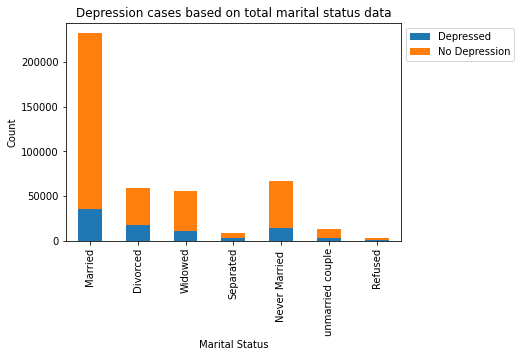

In [5]:
data_to_plot.plot(kind='bar',stacked=True).legend(["Depressed", "No Depression"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1, 2, 3, 4 , 5, 6)
labels = ("Married", "Divorced", "Widowed", "Separated", "Never Married ", "unmarried couple", "Refused")
plt.xticks(positions, labels)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title("Depression cases based on total marital status data")

plt.show()

In [6]:
#Now lets plot by percentages 
data_to_plot_transpose = data_to_plot.transpose()
data_to_plot_percent = data_to_plot_transpose.div(data_to_plot_transpose.sum())
data_to_plot_percent = data_to_plot_percent.transpose()

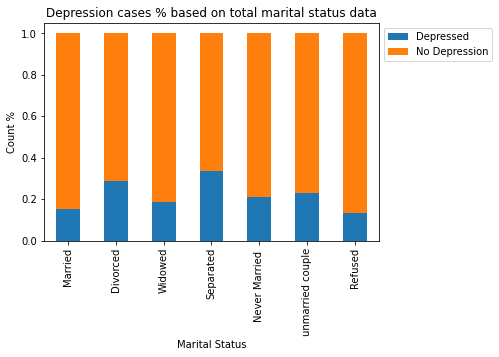

In [7]:
data_to_plot_percent.plot(kind='bar',stacked=True).legend(["Depressed", "No Depression"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1, 2, 3, 4 , 5, 6)
labels = ("Married", "Divorced", "Widowed", "Separated", "Never Married ", "unmarried couple", "Refused")
plt.xticks(positions, labels)
plt.xlabel('Marital Status')
plt.ylabel('Count %')
plt.title("Depression cases % based on total marital status data")

plt.show()
# as we can see from percentages, separated people are most depressed and married people are least depressed, which appears to be true!!!


# Relation between age and depression


In [8]:
plt.figure(figsize=(15,20))
depressionResultYesNo = data.loc[data['ADDEPEV2'].isin([1,2])]
dataframe = depressionResultYesNo.groupby(['_AGEG5YR','ADDEPEV2']).size()
dataframe

_AGEG5YR  ADDEPEV2
1.0       1.0          4029
          2.0         19986
2.0       1.0          3592
          2.0         16040
3.0       1.0          4504
          2.0         18319
4.0       1.0          4887
          2.0         19555
5.0       1.0          5255
          2.0         20589
6.0       1.0          6499
          2.0         23646
7.0       1.0          8853
          2.0         30849
8.0       1.0         10741
          2.0         35262
9.0       1.0         11032
          2.0         38534
10.0      1.0          9727
          2.0         39337
11.0      1.0          6275
          2.0         31924
12.0      1.0          3924
          2.0         24170
13.0      1.0          3993
          2.0         32561
14.0      1.0           477
          2.0          4699
dtype: int64

<Figure size 1080x1440 with 0 Axes>

In [9]:
'''
1 - Age 18 to 24
2 - Age 25 to 29
3 - Age 30 to 34
4 - Age 35 to 39
5 - Age 40 to 44
6 - Age 45 to 49
7 - Age 50 to 54
8 - Age 55 to 59
9 - Age 60 to 64
10 - Age 65 to 69
11 - Age 70 to 74
12 - Age 75 to 79
13 - Age 80 or older
14 - Don’t know/Refused/Missing
'''
data[data['ADDEPEV2']==1.0]._AGEG5YR.value_counts()

#Conclusion : as we can see that people of age 55-59 and 60-64 are most depressed.
data_to_plot = dataframe.unstack()
data_to_plot

ADDEPEV2,1.0,2.0
_AGEG5YR,,
1.0,4029,19986
2.0,3592,16040
3.0,4504,18319
4.0,4887,19555
5.0,5255,20589
6.0,6499,23646
7.0,8853,30849
8.0,10741,35262
9.0,11032,38534


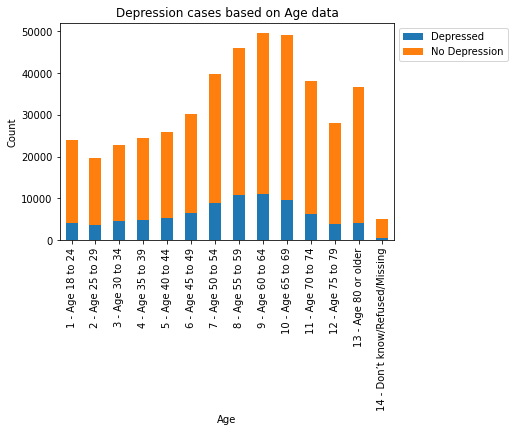

In [10]:

data_to_plot.plot(kind='bar',stacked=True).legend(["Depressed", "No Depression"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1, 2, 3, 4 , 5, 6, 7, 8, 9, 10, 11, 12, 13)
labels = ("1 - Age 18 to 24","2 - Age 25 to 29","3 - Age 30 to 34","4 - Age 35 to 39","5 - Age 40 to 44","6 - Age 45 to 49","7 - Age 50 to 54","8 - Age 55 to 59","9 - Age 60 to 64","10 - Age 65 to 69","11 - Age 70 to 74","12 - Age 75 to 79","13 - Age 80 or older","14 - Don’t know/Refused/Missing")
plt.xticks(positions, labels)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Depression cases based on Age data")
plt.show()

# Relation between weight and depression

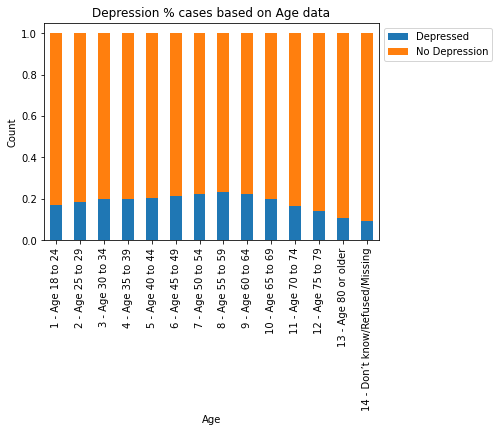

In [11]:

data_to_plot_transpose = data_to_plot.transpose()
data_to_plot_percent = data_to_plot_transpose.div(data_to_plot_transpose.sum())
data_to_plot_percent = data_to_plot_percent.transpose()

data_to_plot_percent.plot(kind='bar',stacked=True).legend(["Depressed", "No Depression"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1, 2, 3, 4 , 5, 6, 7, 8, 9, 10, 11, 12, 13)
labels = ("1 - Age 18 to 24","2 - Age 25 to 29","3 - Age 30 to 34","4 - Age 35 to 39","5 - Age 40 to 44","6 - Age 45 to 49","7 - Age 50 to 54","8 - Age 55 to 59","9 - Age 60 to 64","10 - Age 65 to 69","11 - Age 70 to 74","12 - Age 75 to 79","13 - Age 80 or older","14 - Don’t know/Refused/Missing")
plt.xticks(positions, labels)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Depression % cases based on Age data")
plt.show()

In [12]:
plt.figure(figsize=(15,20))
depressionResultYesNo = data.loc[data['ADDEPEV2'].isin([1,2])]
dataframe = depressionResultYesNo.groupby([pd.cut(depressionResultYesNo["WEIGHT2"], np.arange(100, 500.0+49.0, 50.0)),'ADDEPEV2']).size()
dataframe
data_to_plot = dataframe.unstack()
data_to_plot
#Now lets plot by percentages 
data_to_plot_transpose = data_to_plot.transpose()
data_to_plot_percent = data_to_plot_transpose.div(data_to_plot_transpose.sum())
data_to_plot_percent = data_to_plot_percent.transpose()

<Figure size 1080x1440 with 0 Axes>

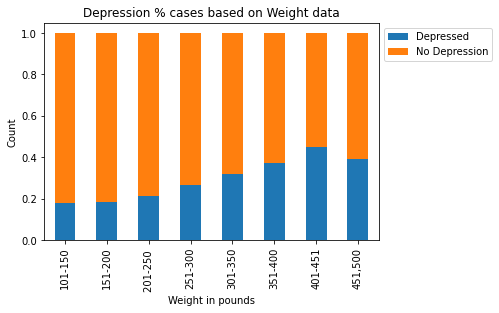

ADDEPEV2,1.0,2.0
WEIGHT2,,
"(100.0, 150.0]",0.179320,0.820680
"(150.0, 200.0]",0.184645,0.815355
"(200.0, 250.0]",0.210697,0.789303
"(250.0, 300.0]",0.263438,0.736562
"(300.0, 350.0]",0.319824,0.680176
"(350.0, 400.0]",0.374194,0.625806
"(400.0, 450.0]",0.449275,0.550725
"(450.0, 500.0]",0.391304,0.608696


In [13]:
data_to_plot_percent.plot(kind='bar',stacked=True).legend(["Depressed", "No Depression"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1, 2, 3, 4 , 5, 6, 7)
labels = ("101-150", "151-200", "201-250 ", "251-300", "301-350", "351-400", "401-451", "451,500")
plt.xticks(positions, labels)
plt.xlabel('Weight in pounds')
plt.ylabel('Count')
plt.title("Depression % cases based on Weight data")
plt.show()
data_to_plot_percent

In [14]:
#conclusion: More percent of people with more weight are depressed